# compute alpha beta eta

In [1]:
def make_models_pred (x):
    
    '''
    r0 = pp
    r1 = qq
    r2 = qp
    r3 = 
    r4 = qw
    r5 = pw
    r6 = p4 p
    r7 = q4 p
    r8 = p4 q
    r9 = q4 q
    r10 = p4 w
    r11 = q4 w
    r12 = p4 p4
    r13 = q4 q4
    r14 = q4 p4
    
    tau_0 = a r0 +b r2 + c r5 + d r6 + e r7
    tau_2 = a r2 +b r1 + c r4 + d r8 + e r9
    tau_5 = a r5 +b r4 + c r3 + d r10 + e r11
    tau_04 = a r6 +b r8 + c r10 + d r12 + e r14
    tau_24 = a r7 +b r9 + c r11 + d r14 + e r13
    
    
    
    
    
    '''
    a,b,c,d,e = x
    DV_data =                    new_results['tau0p']
    DV_data = np.hstack([DV_data,new_results['tau0m']])
    DV_data = np.hstack([DV_data,new_results['tau2p']])
    DV_data = np.hstack([DV_data,new_results['tau2m']])
    DV_data = np.hstack([DV_data,new_results['tau5p']])
    DV_data = np.hstack([DV_data,new_results['tau5m']])
    DV_data = np.hstack([DV_data,new_results['tau04p']])
    DV_data = np.hstack([DV_data,new_results['tau04m']])
    DV_data = np.hstack([DV_data,new_results['tau24p']])
    DV_data = np.hstack([DV_data,new_results['tau24m']])
    
    inv_cov = np.linalg.inv(new_results['tau_cov'])
    
    

    

    DV_model =                      a*new_results['rho0p']+b*new_results['rho2p']+c*new_results['rho5p']+   d*new_results['rho6p'] +  e*new_results['rho7p']
    DV_model = np.hstack([DV_model, a*new_results['rho0m']+b*new_results['rho2m']+c*new_results['rho5m']+   d*new_results['rho6m'] +  e*new_results['rho7m']])
    
    DV_model = np.hstack([DV_model, a*new_results['rho2p']+b*new_results['rho1p']+c*new_results['rho4p'] +  d*new_results['rho8p'] +  e*new_results['rho9p']])
    DV_model = np.hstack([DV_model, a*new_results['rho2m']+b*new_results['rho1m']+c*new_results['rho4m'] +  d*new_results['rho8m'] +  e*new_results['rho9m']])
    
    DV_model = np.hstack([DV_model, a*new_results['rho5p']+b*new_results['rho4p']+c*new_results['rho3p'] +  d*new_results['rho10p'] + e*new_results['rho11p']])
    DV_model = np.hstack([DV_model, a*new_results['rho5m']+b*new_results['rho4m']+c*new_results['rho3m'] +  d*new_results['rho10m'] + e*new_results['rho11m']])
    
    DV_model = np.hstack([DV_model, a*new_results['rho6p']+b*new_results['rho8p']+c*new_results['rho10p'] + d*new_results['rho12p'] + e*new_results['rho14p']])
    DV_model = np.hstack([DV_model, a*new_results['rho6m']+b*new_results['rho8m']+c*new_results['rho10m'] + d*new_results['rho12m'] + e*new_results['rho14m']])
    
    DV_model = np.hstack([DV_model, a*new_results['rho7p']+b*new_results['rho9p']+c*new_results['rho11p'] + d*new_results['rho14p'] + e*new_results['rho13p']])
    DV_model = np.hstack([DV_model, a*new_results['rho7m']+b*new_results['rho9m']+c*new_results['rho11m'] + d*new_results['rho14m'] + e*new_results['rho13m']])
     
    return DV_data,DV_model,inv_cov
    

def model (x):
    DV_data,DV_model,inv_cov = make_models_pred (x)
    



    ddv = DV_data - DV_model
    chi2 = np.matmul(ddv,np.matmul(inv_cov,ddv))
    #chi2 = 0
    #for k in dict_save.keys():
    #    t = dict_save[k]- dict_data[k]
    #    chi2 += np.matmul(t,np.matmul(np.linalg.inv(dict_cov[k]),t))
    return chi2
       
#a = -0.038
#b = 1.09
#c = -0.46

#model(a,b,c)

In [2]:
# load catalogs
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
   
#des scheme
colors = ['#601A4A', '#EE442F','#63ACBE']

import pickle
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=3)
        
def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')
            
new_results = load_obj('rhostat_better_6bin_50_900jk')
#results_old = load_obj('rhostat_better_old')


In [3]:
import emcee

import numpy as np

def log_probability(x):
    return -model(x)

pos = np.array([0,1,0,0,0])+1e-4 * np.random.randn(32, 5)
nwalkers = 32
ndim = 5

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
sampler.run_mcmc(pos, 5000, progress=True);
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

labels=[r'\alpha',r'\beta',r'\eta',r'\alpha_4',r'\beta_4']
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
    #txt = txt.format(mcmc[1], q[0], q[1])#, labels[i])
    print (labels[i]+'= {0:2.3f} ^{1:2.3f}_{2:2.3f}'.format(mcmc[1], q[0], q[1]))
   # display(Math(txt))

results = []
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    results.append(float('{0:2.4f} '.format(mcmc[1])))


You must install the tqdm library to use progress indicators with emcee


\alpha= -0.035 ^0.004_0.004
\beta= -0.675 ^0.095_0.097
\eta= 0.113 ^0.030_0.030
\alpha_4= 0.091 ^0.011_0.010
\beta_4= -0.257 ^0.128_0.122


In [4]:
x = results #-0.0233, -0.6049, 0.0712, 0.0649, -0.4776
DV_data,DV_model,inv_cov = make_models_pred(x)
print ('chi2: {0:2.1f}/{1:2.0f}'.format(model(x),len(DV_data)))


chi2: 156.0/60


chi2: 156.0/60


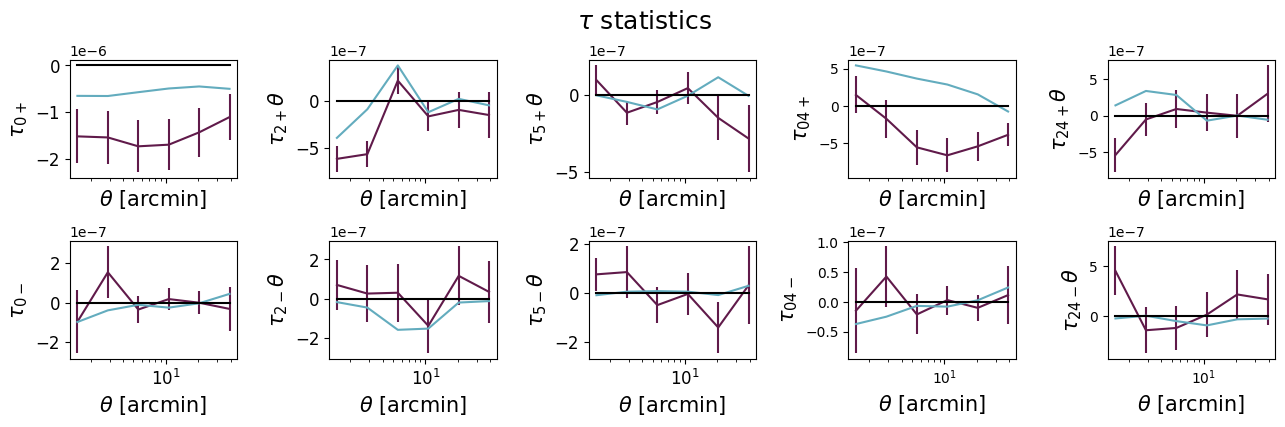

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,5,sharex = True, figsize=(13,4))

xx = 6

th = new_results['th']


ax[0,0].errorbar(th,new_results['tau0p'],np.sqrt(new_results['tau0_cov'].diagonal())[:xx],color=colors[0], label = 'Y3')
ax[0,1].errorbar(th,new_results['tau2p']*th,np.sqrt(new_results['tau2_cov'].diagonal())[:xx]*th,color=colors[0], label = 'Y3')
ax[0,2].errorbar(th,new_results['tau5p']*th,np.sqrt(new_results['tau5_cov'].diagonal())[:xx]*th,color=colors[0], label = 'Y3')
ax[0,3].errorbar(th,new_results['tau04p'],np.sqrt(new_results['tau04_cov'].diagonal())[:xx],color=colors[0], label = 'Y3')
ax[0,4].errorbar(th,new_results['tau24p']*th,np.sqrt(new_results['tau24_cov'].diagonal())[:xx]*th,color=colors[0], label = 'Y3')

ax[1,0].errorbar(th,new_results['tau0m'],np.sqrt(new_results['tau0_cov'].diagonal())[xx:],color=colors[0], label = 'Y3')
ax[1,1].errorbar(th,new_results['tau2m']*th,np.sqrt(new_results['tau2_cov'].diagonal())[xx:]*th,color=colors[0], label = 'DES Y3')
ax[1,2].errorbar(th,new_results['tau5m']*th,np.sqrt(new_results['tau5_cov'].diagonal())[xx:]*th,color=colors[0], label = 'Y3')
ax[1,3].errorbar(th,new_results['tau04m'],np.sqrt(new_results['tau04_cov'].diagonal())[xx:],color=colors[0], label = 'Y3')
ax[1,4].errorbar(th,new_results['tau24m']*th,np.sqrt(new_results['tau24_cov'].diagonal())[xx:]*th,color=colors[0], label = 'Y3')


x = results
DV_data,DV_model,inv_cov = make_models_pred(x)
print ('chi2: {0:2.1f}/{1:2.0f}'.format(model(x),len(DV_data)))

x0 = 0


ax[0,0].errorbar(th,DV_model[x0:x0+xx],color=colors[2], label = 'best fit')
x0 +=xx
ax[1,0].errorbar(th,DV_model[x0:x0+xx],color=colors[2], label = 'best fit')
x0 +=xx
ax[0,1].errorbar(th,DV_model[x0:x0+xx]*th,color=colors[2], label = 'best fit')
x0 +=xx
ax[1,1].errorbar(th,DV_model[x0:x0+xx]*th,color=colors[2], label = 'best fit')
x0 +=xx
ax[0,2].errorbar(th,DV_model[x0:x0+xx]*th,color=colors[2], label = 'best fit')
x0 +=xx
ax[1,2].errorbar(th,DV_model[x0:x0+xx]*th,color=colors[2], label = 'best fit')
x0 +=xx
ax[0,3].errorbar(th,DV_model[x0:x0+xx],color=colors[2], label = 'best fit')
x0 +=xx
ax[1,3].errorbar(th,DV_model[x0:x0+xx],color=colors[2], label = 'best fit')
x0 +=xx
ax[0,4].errorbar(th,DV_model[x0:x0+xx]*th,color=colors[2], label = 'best fit')
x0 +=xx
ax[1,4].errorbar(th,DV_model[x0:x0+xx]*th,color=colors[2], label = 'best fit')
#




ax[0,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,0].set_ylabel(r'$\tau_{0+}$', size = 15)
#ax[0,0].set_title(r'$\tau_{0+}$', size = 20)

ax[0,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,1].set_ylabel(r'$\tau_{2+}\theta$', size = 15)
#ax[0,1].set_title(r'$\tau_{2+}$', size = 20)

ax[0,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,2].set_ylabel(r'$\tau_{5+}\theta$', size = 15)
#ax[0,2].set_title(r'$\tau_{5+}$', size = 20)

ax[1,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,0].set_ylabel(r'$\tau_{0-}$', size = 15)
#ax[1,0].set_title(r'$\tau_{0-}$', size = 20)

ax[1,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,1].set_ylabel(r'$\tau_{2-}\theta$', size = 15)
#ax[1,1].set_title(r'$\tau_{2-}$', size = 20)

ax[1,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,2].set_ylabel(r'$\tau_{5-}\theta$', size = 15)



ax[0,3].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,3].set_ylabel(r'$\tau_{04+}$', size = 15)
#ax[0,0].set_title(r'$\tau_{0+}$', size = 20)

ax[0,4].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,4].set_ylabel(r'$\tau_{24+}\theta$', size = 15)


ax[1,3].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,3].set_ylabel(r'$\tau_{04-}$', size = 15)
#ax[0,0].set_title(r'$\tau_{0+}$', size = 20)

ax[1,4].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,4].set_ylabel(r'$\tau_{24-}\theta$', size = 15)



#ax[1,2].set_title(r'$\tau_{5-}$', size = 20)
#plt.yscale('log')
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#ax[1,1].legend(bbox_to_anchor=(0.5, -0.7),ncol = 2,loc='lower center', fontsize=15)

ax[1,1].tick_params(axis="x", labelsize=12)
ax[1,1].tick_params(axis="y", labelsize=12)
ax[0,1].tick_params(axis="x", labelsize=12)
ax[0,1].tick_params(axis="y", labelsize=12)
ax[1,0].tick_params(axis="x", labelsize=12)
ax[1,0].tick_params(axis="y", labelsize=12)
ax[0,0].tick_params(axis="x", labelsize=12)
ax[0,0].tick_params(axis="y", labelsize=12)
ax[1,2].tick_params(axis="x", labelsize=12)
ax[1,2].tick_params(axis="y", labelsize=12)
ax[0,2].tick_params(axis="x", labelsize=12)
ax[0,2].tick_params(axis="y", labelsize=12)
#plt.subplots_adjust(wspace=0.00, hspace=0.00)
plt.tight_layout()
plt.suptitle(r'$\tau$ statistics',y=1.05,fontsize=18)
plt.xscale('log')

for i in range(5):
    ax[1,i].errorbar(th,th*0.,color='black')
    ax[0,i].errorbar(th,th*0.,color='black')

#plt.savefig('./figures/taus.pdf',bbox_inches='tight')
plt.show()


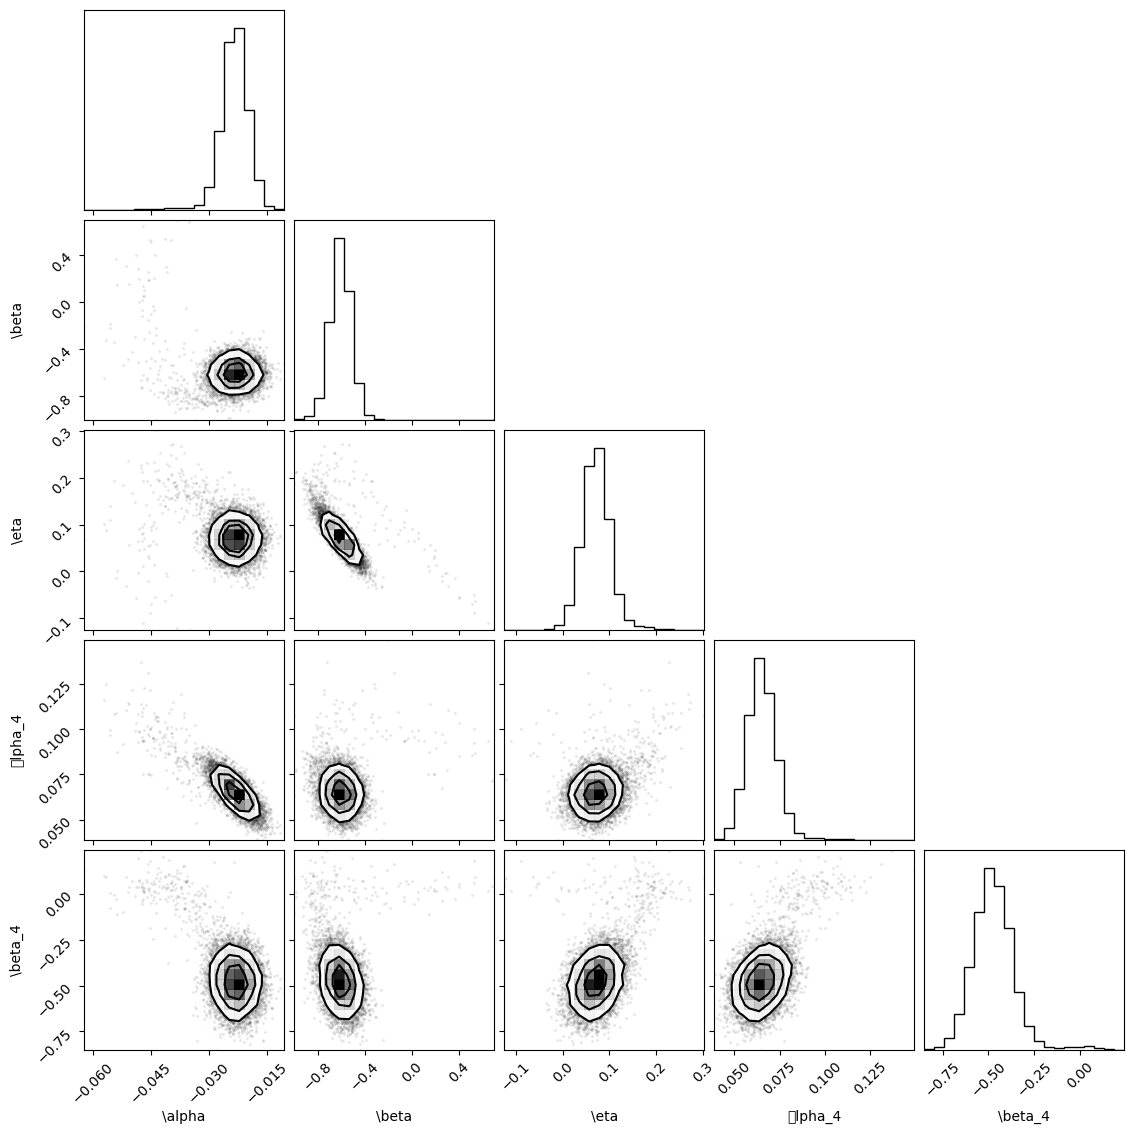

In [92]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
import corner
fig = corner.corner(
    flat_samples, labels=[r'\alpha',r'\beta',r'\eta','\alpha_4',r'\beta_4'])

In [29]:
labels=[r'\alpha',r'\beta',r'\eta',r'\alpha_4',r'\beta_4']
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
    #txt = txt.format(mcmc[1], q[0], q[1])#, labels[i])
    print (labels[i]+'= {0:2.3f} ^{1:2.3f}_{2:2.3f}'.format(mcmc[1], q[0], q[1]))
   # display(Math(txt))

\alpha= -0.039 ^0.004_0.004
\beta= -0.614 ^0.089_0.093
\eta= 1.056 ^0.223_0.226
\alpha_4= 0.095 ^0.010_0.010
\beta_4= -0.466 ^0.117_0.117


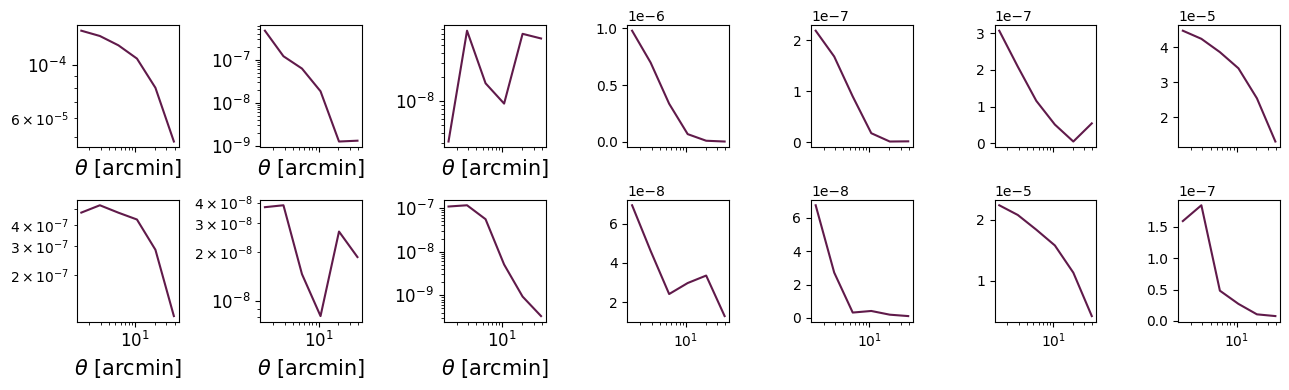

In [8]:
'''
it would be nice to make this nicer...

'''

import matplotlib.pyplot as plt
import numpy as np
th = new_results['th']
fig, ax = plt.subplots(2,7,sharex = True, figsize=(13,4))
ax[0,0].errorbar(th,np.abs(new_results['rho0p']) ,color=colors[0], label = 'Y3')
ax[0,1].errorbar(th,np.abs(new_results['rho1p']) ,color=colors[0], label = 'Y3')
ax[0,2].errorbar(th,np.abs(new_results['rho2p']) ,color=colors[0], label = 'Y3')
ax[0,3].errorbar(th,np.abs(new_results['rho3p']) ,color=colors[0], label = 'Y3')
ax[0,4].errorbar(th,np.abs(new_results['rho4p']) ,color=colors[0], label = 'Y3')
ax[0,5].errorbar(th,np.abs(new_results['rho5p']) ,color=colors[0], label = 'Y3')
ax[0,6].errorbar(th,np.abs(new_results['rho6p']) ,color=colors[0], label = 'Y3')
ax[1,0].errorbar(th,np.abs(new_results['rho7p']) ,color=colors[0], label = 'Y3')
ax[1,1].errorbar(th,np.abs(new_results['rho8p']) ,color=colors[0], label = 'Y3')
ax[1,2].errorbar(th,np.abs(new_results['rho9p']) ,color=colors[0], label = 'Y3')
ax[1,3].errorbar(th,np.abs(new_results['rho10p']) ,color=colors[0], label = 'Y3')
ax[1,4].errorbar(th,np.abs(new_results['rho11p']) ,color=colors[0], label = 'Y3')
ax[1,5].errorbar(th,np.abs(new_results['rho12p']) ,color=colors[0], label = 'Y3')
ax[1,6].errorbar(th,np.abs(new_results['rho13p']) ,color=colors[0], label = 'Y3')

ax[0,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
#ax[0,0].set_ylabel(r'|$\rho_0$|', size = 15)
#ax[0,0].set_title(r'$\rho_0$', size = 20)

ax[0,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
#ax[0,1].set_ylabel(r'|$\rho_1$|', size = 15)
#ax[0,1].set_title(r'$\rho_1$', size = 20)

ax[0,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
#ax[0,2].set_ylabel(r'|$\rho_2$|', size = 15)
#ax[0,2].set_title(r'$\rho_2$', size = 20)

ax[1,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
#ax[1,0].set_ylabel(r'|$\rho_3$|', size = 15)
#ax[1,0].set_title(r'$\rho_3$', size = 20)

ax[1,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
#ax[1,1].set_ylabel(r'|$\rho_4$|', size = 15)
#ax[1,1].set_title(r'$\rho_4$', size = 20)

ax[1,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
#ax[1,2].set_ylabel(r'$|\rho_5$|', size = 15)
#ax[1,2].set_title(r'$\rho_5$', size = 20)
#plt.yscale('log')
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,1].tick_params(axis="x", labelsize=12)
ax[1,1].tick_params(axis="y", labelsize=12)
ax[0,1].tick_params(axis="x", labelsize=12)
ax[0,1].tick_params(axis="y", labelsize=12)
ax[1,0].tick_params(axis="x", labelsize=12)
ax[1,0].tick_params(axis="y", labelsize=12)
ax[0,0].tick_params(axis="x", labelsize=12)
ax[0,0].tick_params(axis="y", labelsize=12)
ax[1,2].tick_params(axis="x", labelsize=12)
ax[1,2].tick_params(axis="y", labelsize=12)
ax[0,2].tick_params(axis="x", labelsize=12)
ax[0,2].tick_params(axis="y", labelsize=12)

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[0,2].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_yscale('log')

ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[0,2].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,2].set_xscale('log')
plt.subplots_adjust(wspace=0.005, hspace=0.005)
plt.tight_layout()